In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

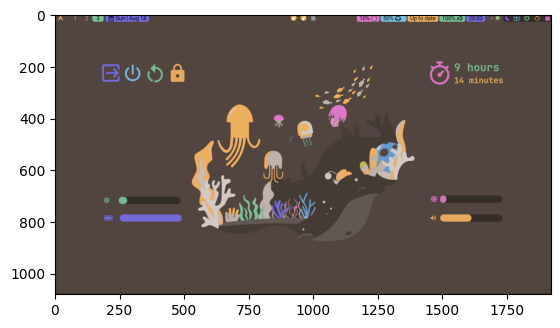

In [43]:
img = cv2.imread('./images/rice1.png')
plt.imshow(img) # shows in BGR, convert to RGB

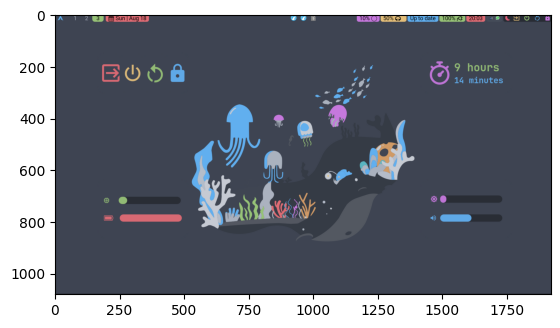

In [44]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [45]:
img = img.reshape((img.shape[1] * img.shape[0], 3))

In [46]:
kmeans = KMeans(n_clusters = 5) # arbitrary number of clusters
s = kmeans.fit(img)

In [47]:
labels = kmeans.labels_
print(labels)
labels = list(labels)

[0 0 0 ... 0 0 0]


In [48]:
centroid = kmeans.cluster_centers_
print(centroid)

[[ 61.62096295  67.57234278  81.20926697]
 [ 95.91996324 171.85289695 233.41998413]
 [213.09149982 116.05975588 112.37789779]
 [186.28718021 175.57010665 204.39804044]
 [163.0098894  182.56229153 120.65065247]]


In [49]:
percent = []
for i in range(len(centroid)):
    j = labels.count(i)
    j /= len(labels)
    percent.append(j)
print(percent)

[0.9337644675925926, 0.02309027777777778, 0.010985243055555555, 0.023914930555555554, 0.008245081018518518]


In [50]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

([<matplotlib.patches.Wedge at 0x7b784dba07d0>,
 [Text(-1.0762711602496287, 0.2272452191244478, '#3d4351'),
  Text(1.0356918138243836, -0.37059744572400766, '#5fabe9'),
  Text(1.069360200196949, -0.257815364621159, '#d57470'),
  Text(1.0911499115145904, -0.13925469687483308, '#baafcc'),
  Text(1.099631015401007, -0.028489120171574286, '#a3b678')])

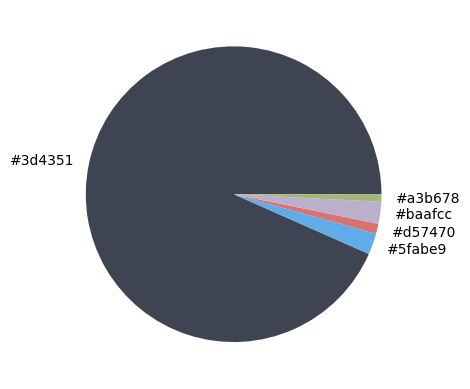

In [51]:
hex_colors = [rgb_to_hex(color) for color in centroid]
plt.pie(percent, colors=np.array(centroid/255), labels=hex_colors)